# Winter 2025 week 2

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Import all the functions from the Utility_functions.py file
from Utility_functions import *

## Exercise 2.1
**(A nice inheritance)** Suppose $1 were invested in 1776 at $3.3%$ interest compounded yearly.

- (a): Approximately how much would that investment be worth today: $1,000, $10,000, $100,000, $1,000,000?

- (b): What if the interest rate were $6.6%$.

### Solution:
- (a): Today is 2025, so there will be $2025-1776$ years. If the principal is $A$, then there will be 

$$A \times (1+r)^{(2025-1776)}$$ 

in total.

In [4]:
A = 1000
r = 0.033

print(f'The value of ${A} in 1776 with interest {r} is now worth $ {A*(1+r)**(2025-1776):.2f} in 2025')

The value of $1000 in 1776 is now worth $ 3243247.25 in 2025


- (b) Similarliy, use the same formula:

In [5]:
A = 1000
r = 0.066

print(f'The value of ${A} in 1776 with interest {r} is now worth $ {A*(1+r)**(2025-1776):.2f} in 2025')

The value of $1000 in 1776 with interest 0.066 is now worth $ 8157253669.41 in 2025


## Exercise 2.2

**(The 72 rule)** The number of years $n$ required for an investment at interest rate $r$ to double in value must satisfy $(1+r)^n = 2$. Using $ln 2 = 0.69$ and the approximation $ln(1+r)\approx r$ valid for small $r$, show $n \approx 69/i$, where $i$ is the interest rate percentage (that is $i=100r$). Using the better approximation $ln(1+r)\approx r - \frac{1}{2}r^2$, show that for $r\approx 0.08$, there holds $n\approx 72/i$.

### Solution:
For a fixed $r$, want to find $n$ such that $(1+r)^n = 2$. Then:
$$ ln(1+r) = ln 2 /n $$
Thus, using the approximation:
$$ n = ln2 / ln(1 + r) \approx ln2/r = \frac{0.69}{i/100} = 69/i$$

Similarly, using the better approximation:
$$ n = ln2/ln(1+r) \approx \frac{ln2}{r-\frac{1}{2}r^2}$$

When $r\approx 0.08$, $r-\frac{1}{2}r^2 \approx 0.96 r$, then $n\approx (69/0.96)/i \approx 72/i$.

In [6]:
print(69/0.96)

71.875


In [10]:
# The difference between ln(1+r) and r

from math import log

r = 0.002
print(f'The difference between ln(1+r) and r is {abs(log(1+r)-r):.4f}')

The difference between ln(1+r) and r is 0.0000


## Exercise 2.3
**(Effective rates)** Find the corresponding effective rates for: 
- (a) 3% compounded monthly.  
- (b) 18% compounded monthly. 
- (c) 18% compounded quarterly.

###  Solution:
We need to find $r_0$ such that:
$$ (1+r/n)^n = (1+r_0)$$

In [14]:
r = 0.03
n = 12
print(f'The value of r0 is {((1+r/n)**n-1)*100:.4f} %')

The value of r0 is 3.0416 %


## Exercise 2.5
**(Tree cut)** Suppose that you have the opportunity to plant trees that later can be sold for lumber. This project requires an initial outlay of money in order to purchase and plant the seedlings. No other cash flow occurs until the trees are harvested. However, you have a choice as to when to harvest. If you harvest after 1 year, you get your return quickly; but if you wait, the trees will have additional growth and the revenue generated from the sale of the trees will be greater. Assume that the cash flow streams associated with these alternatives are:
  - Wait 1 year: $(-1, 2)$
  - Wait 2 year: $(-1, 0, 3)$
  - Wait 3 year: $(-1, 0, 0, 4)$
  - $\vdots$
  - Wait n year $(-1, 0, 0,\ldots, n+1)$

The prevailing interest rate is 10%. When is the best time to cut the trees?

### Solution:
According to the cash flow, the present value of the cash flow:
$$ -1 + \frac{n+1}{(1+r)^n}$$
To get the maximal, we need to find the continuous equation and its derivate:

$$ f(t) = -1 + \frac{t+1}{(1+r)^t} $$

$$ f'(t) = \frac{(1+r)^t - ln(1+r)(1+r)^t(1+t)}{(1+r)^{2t}} $$

Solve $f'(t) = 0$, we get: $t=\frac{1}{ln(1+r)}-1$.

In [15]:
r = 0.1
print(f'The value of t is {1/log(1+r)-1:.4f}')

The value of t is 9.4921


Then, we need to compute when $n = 9$ and $n =10$.

In [17]:
n = 9
r = 0.1
def value(r,n):
    return -1 + (n+1)/(1+r)**n

print(f'The value at day 9 is {value(r,9)}, the value at day 10 is {value(r,10)}')

The value at day 9 is 3.240976183724846, the value at day 10 is 3.240976183724846


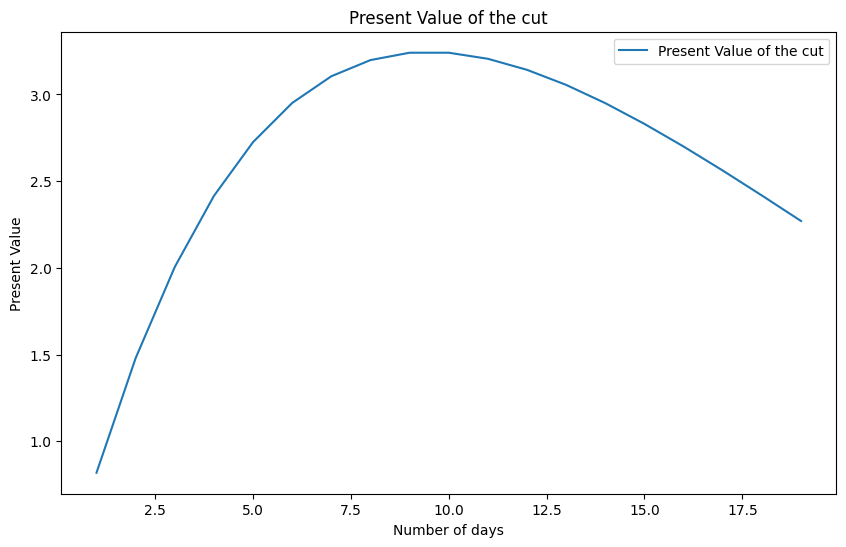

In [19]:
plt.figure(figsize=(10,6))

# Create a list of values for the x-axis
x = [i for i in range(1,20)]

plt.plot(x, [value(r,i) for i in x], label='Present Value of the cut')

plt.xlabel('Number of days')
plt.ylabel('Present Value')

plt.title('Present Value of the cut')
plt.legend()
plt.show()

## Exercise 2.8
**(Sunk costs)** A young couple has made a nonrefundable deposit of the first month’s rent (equal to 1,000) on a 6-month apartment lease. The next day they find a different apartment that they like just as well, but its monthly rent is only 900. They plan to be in the apartment only 6 months. Should they switch to the new apartment? What if they plan to stay 1 year? Assume an interest rate of 12%.

### Solution
The cash flow of the first choice:
$$[1000, 1000,...,1000]$$
The second choice:
$$[1900, 900,...,900]$$
Then we need to compute the present value, where we will call the previously defined function.

In [29]:
# For half year
cf1 = [1000]*6
cf2 = [1900] + [900]*5
r = 0.12/12

print(f'The present value of the first cash flow is {PV(r, cf1):.2f}')
print(f'The present value of the second cash flow is {PV(r, cf2):.2f}')

The present value of the first cash flow is 5853.43
The present value of the second cash flow is 6268.09


In [30]:
# For one year
cf1 = [1000]*12
cf2 = [1900] + [900]*11
r = 0.12/12

print(f'The present value of the first cash flow is {PV(r, cf1):.2f}')
print(f'The present value of the second cash flow is {PV(r, cf2):.2f}')

The present value of the first cash flow is 11367.63
The present value of the second cash flow is 11230.87


So it is OK to switch if they stay for a year. For half of a year, not.

## Exercise 2.11
**(An appraisal)** You are considering the purchase of a nice home. It is in every way perfect for you and in excellent condition, except for the roof. The roof has only 5 years of life remaining. A new roof would last 20 years, but would cost 20,000. The house is expected to last forever. Assuming that costs will remain constant and that the interest rate is 5\%, what value would you assign to the existing roof?

Hint: Consider the present value of change the roof now, and then every 20 years, and change the root in 5 year, and then every 20 years. The difference between their present value is the value of existing roof.

### Soluton:

The value of the existing roof will be the difference of the present values of the two choices
The cash flow of the first choice:
$$[20000, 0, 0,..., 20000, 0, ..., 0, 20000,0,...]$$

The cash flow of the second choice:
$$[0,0,0,0,0, 20000, 0,..., 20000, ...]$$

Thus, we need to consider the present value of two cash flows:

$$PV_1 = \sum_0^\infty 20000\cdot (1/1.05)^{20n} = 20000 \cdot \left(\frac{1}{1-(\frac{1}{1.05})^{20}} \right)$$

$$PV_2 = \sum_0^\infty 20000\cdot(1/1.05)^{20n+5} = \frac{20000}{1.05^5}\cdot \left(\frac{1}{1-(\frac{1}{1.05})^{20}} \right)$$

Then we can check.

In [31]:
print(f"The present value of the option 1 is given by {20000*(1/(1-1/1.05**20)): .2f}")
print(f"The present value of the option 2 is given by {20000/(1.05)**5*(1/(1-1/1.05**20)): .2f}")
print(f"The value of the existing roof is given by {20000*(1/(1-1/1.05**20))-20000/(1.05)**5*(1/(1-1/1.05**20)): .2f}")

The present value of the option 1 is given by  32097.03
The present value of the option 2 is given by  25148.87
The value of the existing roof is given by  6948.17
